# Generate Single Dose-Response Curve
The following will demo how to calculate the IC50 for a given drug response and generate single dose-response curve.  

This tutorial will use dummy data found under the ['../dataset' folder]((https://github.com/tlint101/py50/tree/main/dataset)). The calculation requires inputs from a DataFrame. As shown, only specific information is needed to run the calculations. Finally, the information will be plotted on a sigmoidal curve. 

## Example start
First, import modules and the dataset.

In [1]:
import pandas as pd
from py50 import Calculator, PlotCurve

In [2]:
df = pd.read_csv('../dataset/single_example.csv')
df.head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


## Calculate IC50

The example dataframe will need to be converted into an instance of the Calculate class. Once converted, the table can also be printed for viewing and checking.  

In [3]:
data = Calculator(df)
data.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


Currently, the py50 program requires the at least 3 columns as input. The rest of the columns will be ignored.
py50 requires a column containing the following:
- drug name
- concentration
- response average

Note that py50 requires the response average. 

The names for the corresponding columns can be passed in the "calculate_ic50()" function as follows:

In [4]:
ic50 = data.calculate_ic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
ic50

,compound_name,maximum,minimum,ic50 (nM),hill_slope
0,Drug 1,92.854406,-7.640226,439.824233,1.040878


Where the maximum and minimum corresponds to the maximum and minimum response. The Hill slope is the hill coefficient. This table can be output as a separate .csv file. For this tutorial, we will output the final table as a markdown table. 

**NOTE**: The calculation in this table is the Relative IC50 value. For more information, see tutorial [003_absolute_ic50.ipynb](https://github.com/tlint101/py50/blob/main/tutorials/002_absolute_ic50.ipynb).

In [5]:
print(ic50.to_markdown(index=False, tablefmt="simple"))

compound_name      maximum    minimum    ic50 (nM)    hill_slope
---------------  ---------  ---------  -----------  ------------
Drug 1             92.8544   -7.64023      439.824       1.04088


## Plotting
py50 contains functions that will generate dose-response curves. Let's generate a sigmoidal curve from the dataset. This time the dataframe will need to be instantiated into the PlotCurve class.
From there, the dataset will be calculated and the resulting information will be ploted on a graph. 

In [6]:
plot_data = PlotCurve(df)

# The input dataset can be inspected as follows:
# data.show()

For this example, plotting the dose-response curve uses the single_curve_plot() function. By default, py50 will assume drug concentrations are in nanomolar (nM) concentration and will convert them into micromolar (µM) concentrations. This will also mean that the final scale on the x-axis will be in µM. As the dosages for a typical test vary greatly in concentrations, the scale of the concentration will be in log format by default. However, depending on user needs, these can be changed. Additional paramters and their explination can be found [here](https://github.com/tlint101/py50).

First. Here we will call the "single_curve_plot" method with the associated parameters:

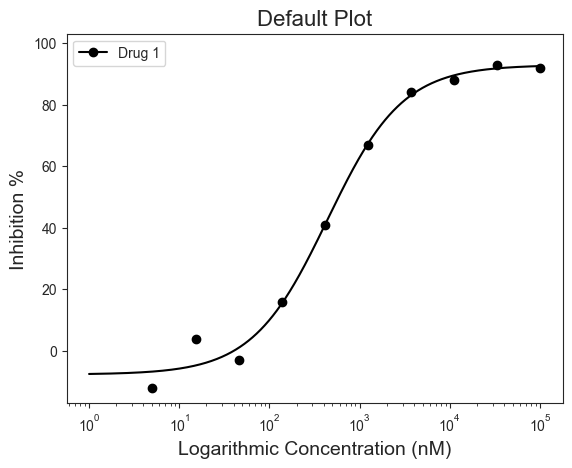

In [7]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='Default Plot',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (nM)',
                              ylabel='Inhibition %',
                              legend=True)

### Customize figure
By default the program will assume that the input drug concentrations are in nanomolar (nM). This can be modified to µM if needed. The xscale_ticks argument will modify the range on the X-axis and accepts a tuple that indicates said range. This will adjust the line plot accordingly and better fits the µM concentrations.

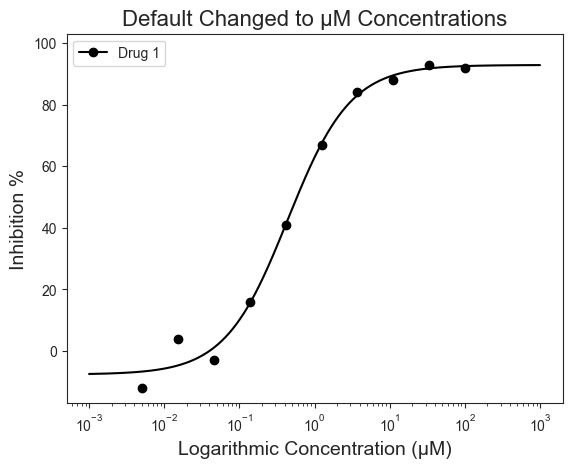

In [8]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='Default Changed to µM Concentrations',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (µM)',
                              ylabel='Inhibition %',
                              conc_unit='µM',  # Adjusted unit concentration to µM
                              xscale_ticks=(-3, 3),  # To adjust the line curve
                              legend=True)

The above figure looks great! But what if we wanted our graph to "**pop**"? Personally, I prefer colors  (Teal (#008080) anyone?). Good news! There are several ways to adjust the graph to highlight the information you want to convey. For colors, we will start with the "line_color=" parameter. The line color can be a specific color name (i.e. red, blue, green, etc) or a hex code. Here is an example of a colored line in "teal" (#008080).

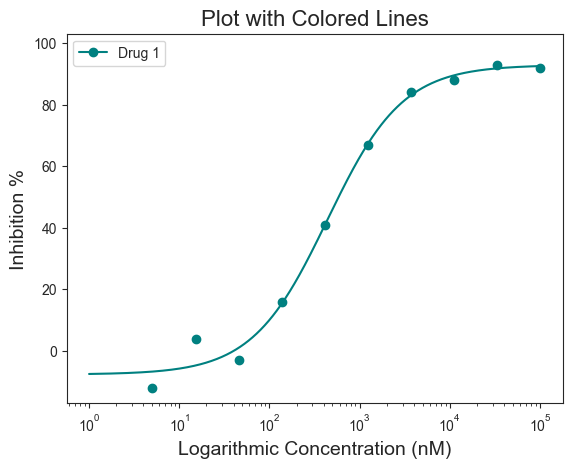

In [9]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='Plot with Colored Lines',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (nM)',
                              ylabel='Inhibition %',
                              line_color='#008080',
                              legend=True)

### Error Bars
Error bars can be given for single curve plots. A list of inhibitory activity must be given. Mean calculations are performed internally and used to create the errorbars using seaborn. By default, the standard deviation ("sd") scale will be used. Additional options can be found [here](https://seaborn.pydata.org/tutorial/error_bars.html).

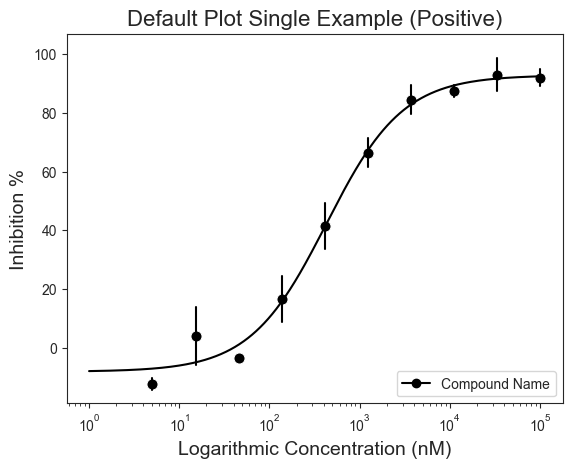

In [10]:
single = pd.read_csv('../dataset/single_example.csv')
plot_data = PlotCurve(single)

figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col=['% Inhibition 1', '% Inhibition 2'],
                              plot_title='Default Plot Single Example (Positive)',
                              name_col='Compound Name',
                              xlabel='Logarithmic Concentration (nM)',
                              ylabel='Inhibition %',
                              legend=True,
                              errorbar='sd',
                              legend_loc='lower right')

The mean calculations occur internally. As a result, the table will be appended with the results. This can be visualized using the show() method. Additionally, the table can be saved using the to_csv() method. Give a path param to designate save location.

In [11]:
plot_data.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg,inhibition_average
0,Drug 1,100000.0,90,94,92,92.0
1,Drug 1,33300.0,97,89,93,93.0
2,Drug 1,11100.0,86,89,88,87.5
3,Drug 1,3700.0,81,88,84,84.5
4,Drug 1,1240.0,63,70,67,66.5


### Box Highlighting
That doesn't look half bad! But what if you want to highlight the IC50 value? That would give people a quick way to identify where the IC50 lies on the curve. That can be achieved using the "box=" parameter. The box argument is a boolean argument and by default it will draw a box at the 50% response with respect to the curve.


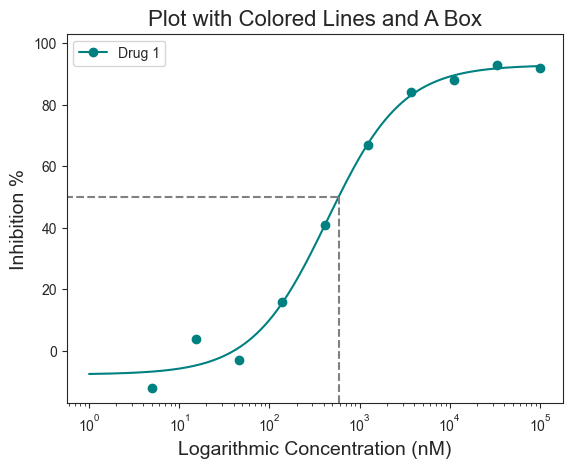

In [12]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='Plot with Colored Lines and A Box',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (nM)',
                              ylabel='Inhibition %',
                              line_color='#008080',
                              box=True,
                              legend=True)

#### Box Highlight Colors
The box highlight can be further modified for color and specific response position you may be interested in. For example, what if you want the box to be red and also highlight IC$_{60}$ or IC$_{90}$? This can be achieved by using the "box_intercept=" and "box_color=" parameters

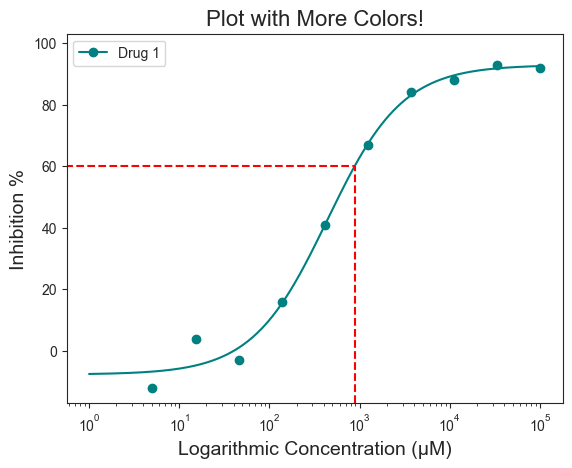

In [13]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='Plot with More Colors!',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (µM)',
                              ylabel='Inhibition %',
                              line_color='#008080',
                              box=True,
                              box_intercept=60,
                              box_color='red',
                              legend=True)

#### Line Highlights
Maybe a box is not good for a specific plot. That can be changed by using vertical and horizontal lines that span the entire graph. This can be accessed using the hline and vline arguments.

**Note:** For the vline argument, the concentration must be in the same unit as the graph. In this example the units are in nM, so the vline input must be 6000. If the x-axis was in µM, then the input will need to be 600. 

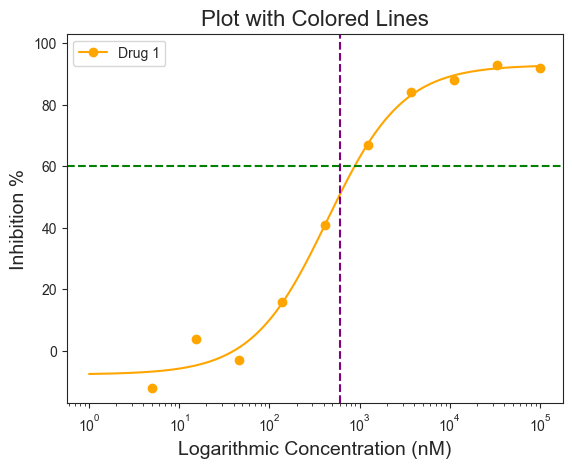

In [14]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='Plot with Colored Lines',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (nM)',
                              ylabel='Inhibition %',
                              line_color='orange',
                              hline=60,
                              hline_color='green',
                              vline=600,
                              vline_color='purple',
                              legend=True)

#### Combining highlights
For those interested, the highlighting options can be combined furhter. Here the plot has the box, hline, and vline to highlight specific areas on the plot. 

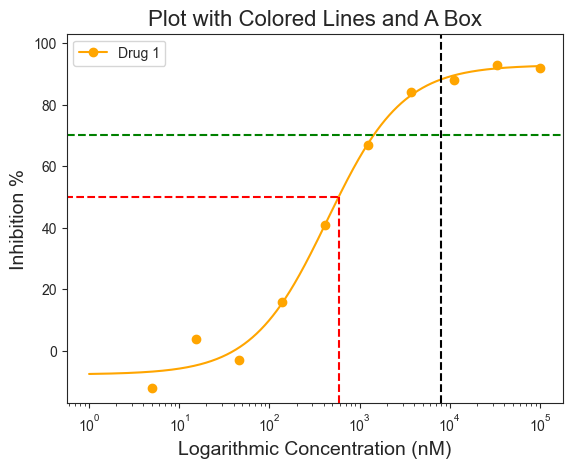

In [15]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='Plot with Colored Lines and A Box',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (nM)',
                              ylabel='Inhibition %',
                              line_color='orange',
                              box=True,
                              box_color='red',
                              hline=70,
                              hline_color='green',
                              vline=8000,
                              vline_color='black',
                              legend=True)

#### Adjusting x-axis

Finally, the x-axis can be further adjusted. 

The scale can be changed from log to linear using the "conc_scale=" argument, changing the shape of the curve from sigmoid to a normal curve. The units of the scale can be changed to nM using the "xscale_unit=" argument. Currently only µM and nM optoins are available. 

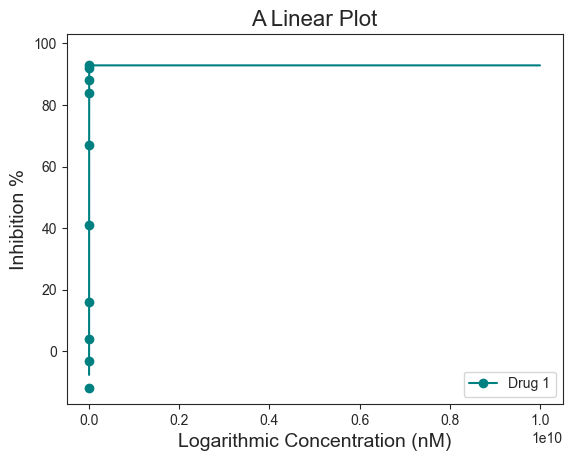

In [16]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='A Linear Plot',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (nM)',
                              ylabel='Inhibition %',
                              line_color='#008080',
                              box=False,
                              legend=True,
                              xscale='linear',
                              conc_unit='nM',
                              xscale_ticks=(-2.5, 10))

For this dataset, the "conc_scale='linear'" does not look as good. 

Also notice how on the linear plot the xscale_ticks was also adjusted to fit the concentration in nM scale. This was achieved using the "xscale_ticks=" argument. Note that the xscale_ticks will affect how the line curve is drawn and should be adjusted to fit the dataset on the plot. Notice how the plot below has the xscale_ticks ranging from 0 to 2 and how it would affect the resulting curve line. This will also have an impact on the box highlighting the specific inhibition response. Or more specifically, the box is "constrained" to the end of the drawn line.   

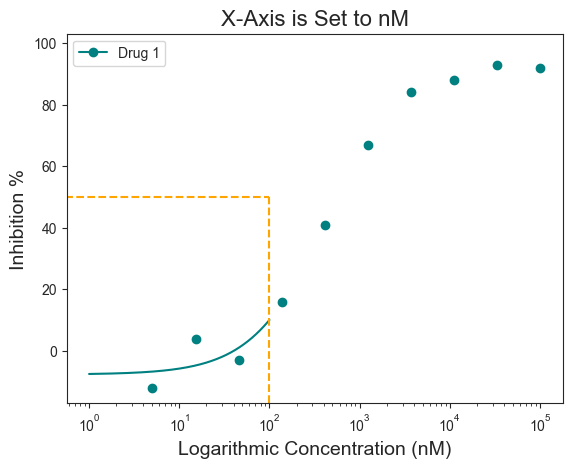

In [17]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='X-Axis is Set to nM',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (nM)',
                              ylabel='Inhibition %',
                              line_color='#008080',
                              box=True,
                              box_color='orange',
                              legend=True,
                              xscale='log',
                              conc_unit='nM',
                              xscale_ticks=(0, 2))

## Verbose
To plot the graph, calculations were performed in the background. The results of these calculations can be printed alongside the generation of the figure using the verbose= argument. 

In this example, when the verbose=True, information about what unit the drug concentration is in, the unit of the x-axis, and the concentration of the drug at 50% response is given. 

Drug 1 concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  0.585 µM
Box Y intersection:  50 %


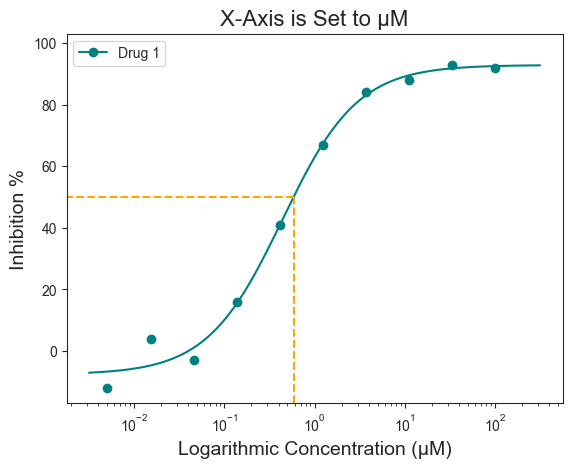

In [18]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='X-Axis is Set to µM',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (µM)',
                              ylabel='Inhibition %',
                              line_color='#008080',
                              box=True,
                              box_color='orange',
                              legend=True,
                              xscale='log',
                              conc_unit='µM',
                              xscale_ticks=(-2.5, 2.5),
                              verbose=True,  # Verbose argument
                              output_filename=None)

## Saving the figure
Finally, the figure can be saved using the "output_filename=" argument. Change "None" to file path of choice. Image should save in .png format.  

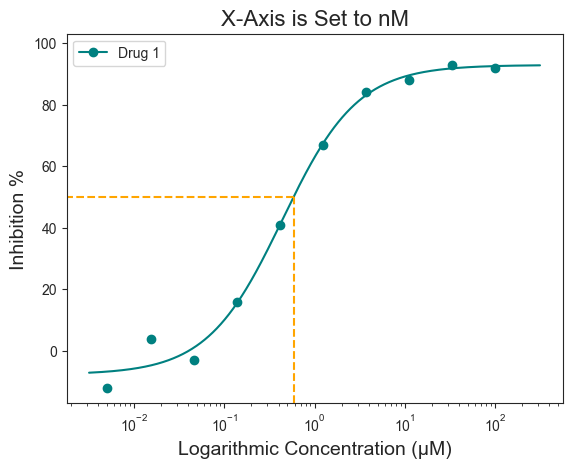

In [19]:
figure = plot_data.curve_plot(concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='X-Axis is Set to nM',
                              name_col='Drug 1',
                              xlabel='Logarithmic Concentration (µM)',
                              ylabel='Inhibition %',
                              line_color='#008080',
                              box=True,
                              box_color='orange',
                              legend=True,
                              xscale='log',
                              conc_unit='µM',
                              xscale_ticks=(-2.5, 2.5),
                              output_filename=None)

Additionally, the figure can also be saved as follows:

In [20]:
figure.savefig('tutorial_figure_001.png')